In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [4]:
df = pd.read_csv(r"D:\Mikun\All Learnings\EDA learnings\EDA- HEALTHCARE DOMAIN\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploratory Data Analysis

### Check Shape of the dataset.

In [9]:
print(f'The Shape of the dataset (rows, column): {df.shape}') # 303 rows and 14 column

The Shape of the dataset (rows, column): (303, 14)


### Preview the dataset

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Summary of Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Dataset description
* The dataset contains several columns which are as follows:-
    - age: age in years
    - sex: (1 = male, 0 = female)
    - cp: chest pain type
    - trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    - chol: serum cholestoral in mg/dl
    - fbs: (fasting blood sugar > 120 mg/dl) (1=true; 0=false)
    - restecg: resting electrocardiographic results
    - thalach: maximum heart rate achieved
    - exang: exercise induced agina (1 = yes; 0=no)
    - oldpeak: ST depression induced by exercise relative to rest
    - slope: the slope of the peak exercise ST segment
    - ca: number of major vessels (0-3) colored by flourosopy
    - thal: 3 = normal; 6=flex defect; 7=reversable defect
    - target: 1 or 0

### Check the data types of columns
* The above `df.info()` command gives us the number of filled values along with the data types of columns.
* If we simply want to check the data type of particular column, we can use the following commnand.

In [12]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Important point need to consider about dataset
- `Sex` is a character variable. It's data type should be object. But it is encoded as ( 1 = male; 0=female). So, its data type is give as `int64`.
- Same is in the case with several other variables -: `fbs`, `exang` and `target`.
- `fbs (fasting blood sugar)` should be a character variable as it contains only 0 and 1 as values (1= true and 0 =false). As it contains only 0 and 1 aas values, so it data type is given as integer.
- `exang (exercise induced angina)` should also be a character variable as it contains only 0 and 1 as values (1 = yes; 0 = no). It also contains only 0 and 1 as values, so its data type is given as int64.
- `target` should also be a character variable. But, it also contains 0 and 1 as values. So, its data type is given as int64.

### Statistical properties of dataset

In [13]:
# Statistical properties of dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Important point to consider in `df.describe()`


- The above command `df.describe()` helps us to view the statistical properties of numerical variables. It excludes character variables.

- If we want to view the statistical properties of character variables, we should run the following command -

     `df.describe(include=['object'])`
     
- If we want to view the statistical properties of all the variables, we should run the following command -

     `df.describe(include='all')`      

### View Column Names

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Univariate analysis

### Analysis of `target` feature variable
* Our feature varaible intrest is `target`.
* It refers to the presence of heart disease in the patient.
* It is integer values as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).
* So in this section I will analyze the `target` variable.
* Here target is `dependent variable`, means it depends on other feature variable present in the dataset.

### Check the number of unique values in `target` variable.

In [16]:
df['target'].nunique()

2

We can see that there are 2 unique values in the `target` variable.

### View the unique values in `target` variable.

In [17]:
df['target'].unique()

array([1, 0])

Here we can see there two unique values 1 and 0.
- 1 stands for presence of heart disease.
- 0 stands for absence of heart disease.

### Frequency distribution of `target` variable

In [20]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

##### From above we can analyse:
* `1` (Presence of heart disease): There are 165 patients suffering from heart disease.
* `0` (Absence of heart disease): There are 138 patients who do not have heart disease.

### Visualize frequency distribuion of `target` variable

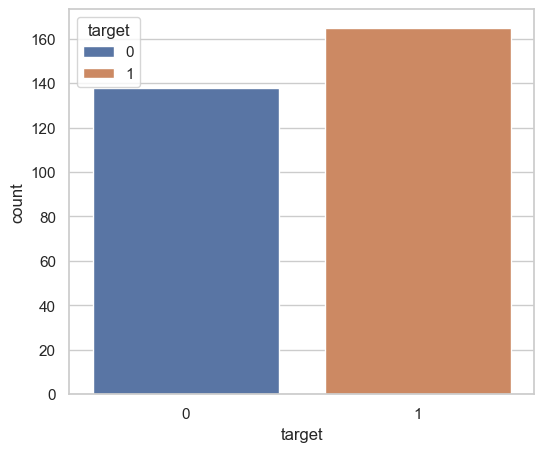

In [29]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.countplot(x='target', data=df, hue="target")
plt.show()

### Above Plot Interpretation
* The above plto confirms the findings that-
    * There are 165 patients suffering from heart disease, and
    * There are 138 patients who do not have any heart disease.

### Frequency distribution of `target` variable w.r.t `sex`

In [30]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

### From above
* `sex` variable contains two integer values 1 and 0: (1=male and 0=female)
* `target` variable also contains two integer values 1 and 0: (1 = presence of heart disease; 0=Absence of heart disease)
* Out of 96 females - 72 have herat disease and 24 do not have heart disease.
* Out of 207 males - 93 have heart disease and 114 do not hae heart disease.

### Viseualize the value counts of the `sex` variable w.r.t `target` as follows:-

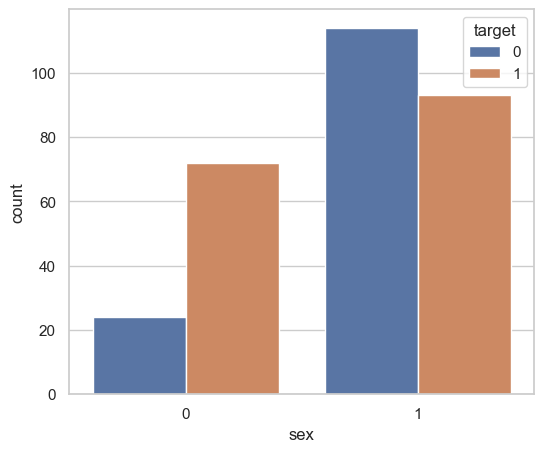

In [33]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.countplot(x='sex', data=df, hue='target')
plt.show()

#### Interpretation

- We can see that the values of `target` variable are plotted wrt `sex` : (1 = male; 0 = female).

- `target` variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- The above plot confirms our findings that -

    - Out of 96 females - 72 have heart disease and 24 do not have heart disease.

    - Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.


Alternatively, we can fisualize the same information in this manner:

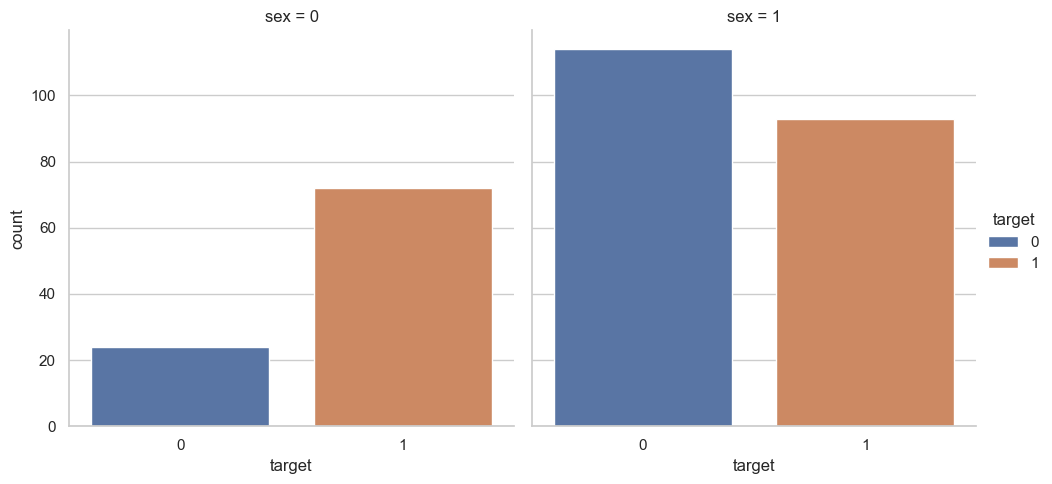

In [37]:
ax = sns.catplot(x='target', col='sex', data=df, kind='count', height=5, aspect=1, hue='target')
plt.show()

#### Comment


- The above plot segregate the values of `target` variable and plot on two different columns labelled as (sex = 0, sex = 1).

- I think it is more convinient way of interpret the plots.

#### We can plot the bars horizontally as foolows:

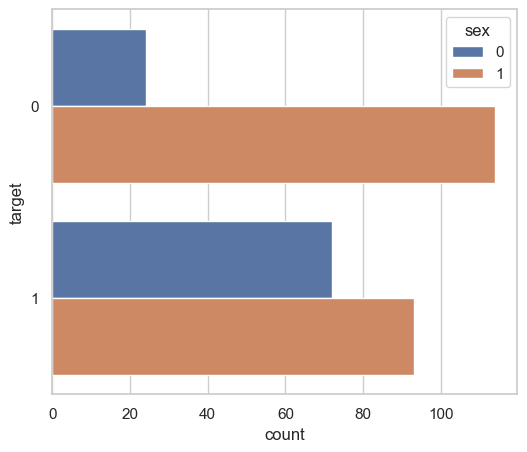

In [38]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.countplot(y='target', hue='sex', data=df)
plt.show()

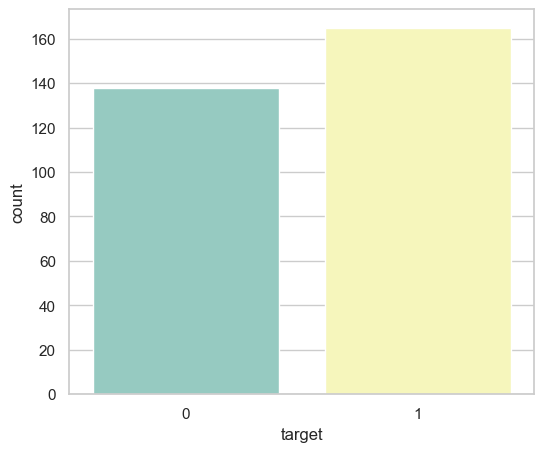

In [39]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.countplot(x="target", data=df, palette="Set3")
plt.show()

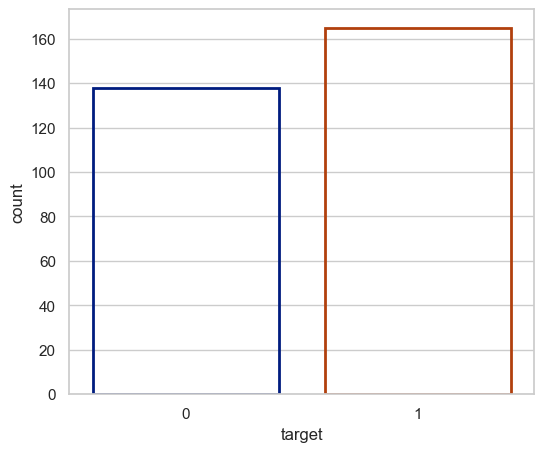

In [50]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.countplot(x='target', data=df, facecolor=(0,0,0,0), linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))
plt.show()

#### Comment


- I have visualize the `target` values distribution wrt `sex`. 

- We can follow the same principles and visualize the `target` values distribution w.r.t `fbs (fasting blood sugar)` and `exang (exercise induced angina)`.

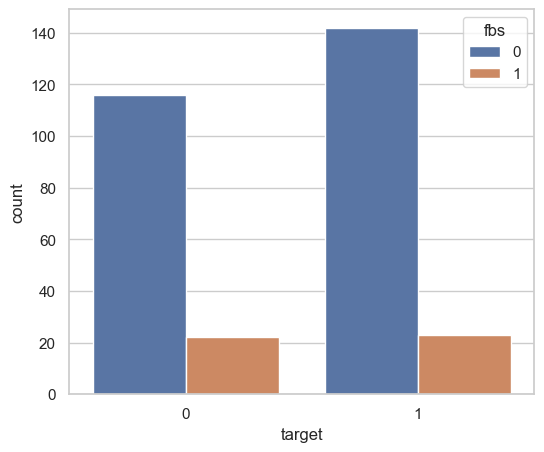

In [56]:
# target with respect to fbs(fasting blood sugar)
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.countplot(x='target', hue='fbs', data=df)
plt.show()

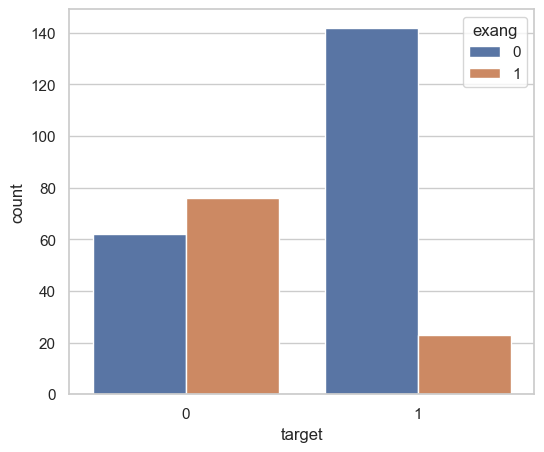

In [57]:
# target with respect to exang ( exercise induced agina)
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.countplot(x="target", hue="exang", data=df)
plt.show()

### Findings of Univariate Analysis <a class="anchor" id="7.2"></a>

Findings of univariate analysis are as follows:-

-	Our feature variable of interest is `target`.

-   It refers to the presence of heart disease in the patient.

-   It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).

- `1` stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

- Similarly, `0` stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

- There are 165 patients suffering from heart disease, and 
   
- There are 138 patients who do not have any heart disease.

- Out of 96 females - 72 have heart disease and 24 do not have heart disease.

- Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.


# Bivariate Analysis

### Estimate correlation coefficients <a class="anchor" id="8.1"></a>

Our dataset is very small. So, I will compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. I will compute it using the `df.corr()` method as follows:-

In [59]:
correlation= df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


The target variable is `target`. So, we should check how each attribute correlates with the `target` variable. We can do it as follows:-

In [60]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

#### Interpretation of correlation coefficient

- The correlation coefficient ranges from -1 to +1. 

- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with `target` variable.

- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with `target` variable.

- When it is close to 0, it means that there is no correlation. So, there is no correlation between `target` and `fbs`.

- We can see that the `cp` and `thalach` variables are mildly positively correlated with `target` variable. So, I will analyze the interaction between these features and `target` variable.



### Analysis of `target` and `cp` variable

#### Expore `cp` variable
* `cp` stands for chest pain type.
* First, I will check number of unique values in `cp` variable.

In [61]:
df['cp'].nunique()

4

So, therea are 4 unique values in `cp` variable. Hence, it is a categerical variable.

Now, I will view its frequency distribution as follows:


In [62]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

#### Comment

- It can be seen that `cp` is a categorical variable and it contains 4 types of values - 0, 1, 2 and 3.

### Visualize the frequency distribution of cp variable

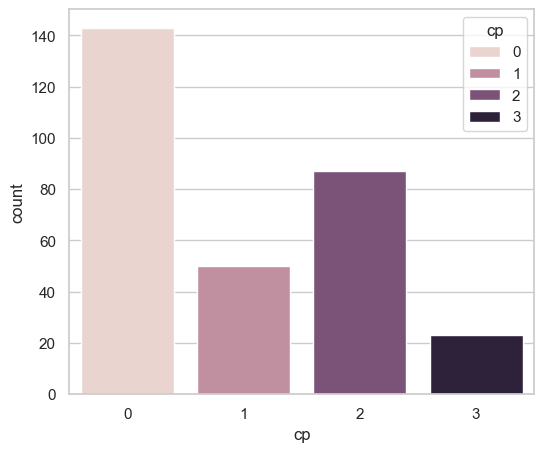

In [64]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.countplot(x='cp', data=df, hue='cp')
plt.show()

Frequency distribution of `target` variable w.r.t `cp`

In [65]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

#### Comment


- `cp` variable contains four integer values 0, 1, 2 and 3.

- `target` variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- So, the above analysis gives `target` variable values categorized into presence and absence of heart disease and groupby `cp` variable values.

- We can visualize this information below.

### Visualize the value counts of the `cp` variable w.r.t `target` as follows:

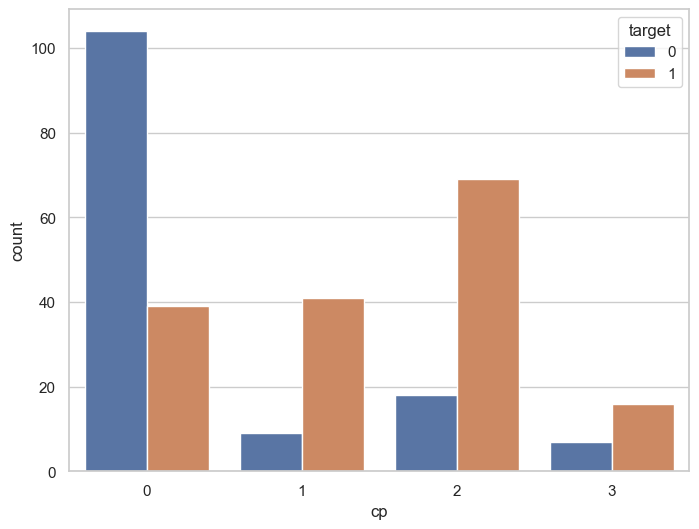

In [66]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='cp', hue='target', data=df)
plt.show()

#### Interpretation

- We can see that the values of `target` variable are plotted w.r.t `cp`.

- `target` variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- The above plot confirms our above findings, 

Alternatively, we can visualize the same information as follows:

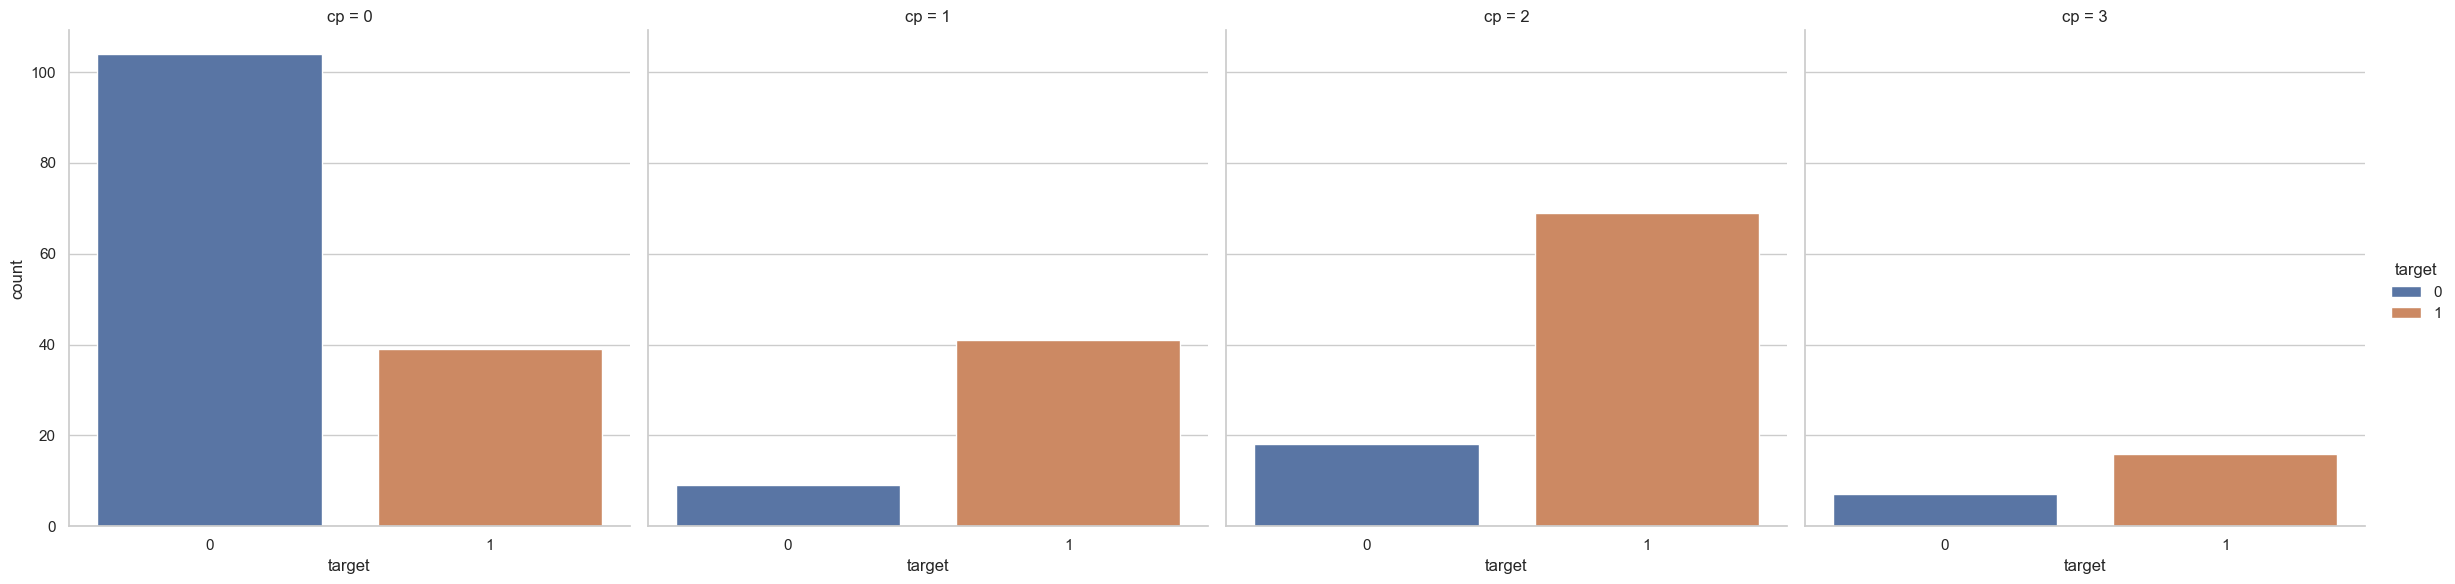

In [78]:
ax = sns.catplot(x='target', col='cp',hue='target',
                 data=df, kind='count', height=6, aspect=1)
plt.show()

### Analysis of `target` and `thalach` variable

### Explore thalach variable
* `thalach` stands for maximum heart rate achieved.
* I will check number of unique values in thalach variable as follows:

In [79]:
df['thalach'].nunique()

91

- So, number of unique values in `thalach` variable is 91. Hence, it is numerical variable.

- I will visualize its frequency distribution of values as follows :

### Visualize the frequency distribution of `thalach` variable

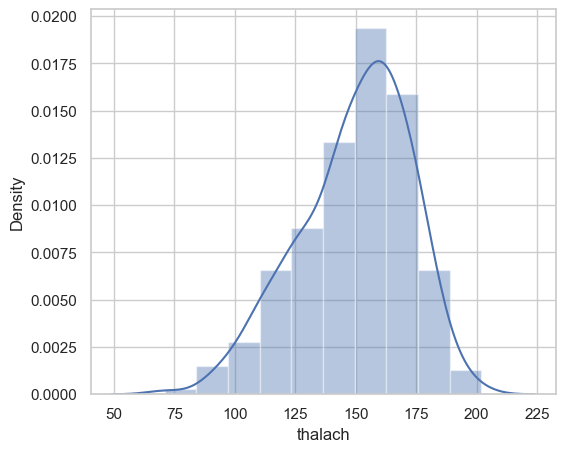

In [80]:
fig, ax = plt.subplots(figsize=(6,5))
x = df['thalach']
ax = sns.distplot(x, bins=10)
plt.show()

#### Comment

- We can see that the `thalach` variable is slightly negatively skewed.

We can use Pandas series object to get an informative axis label as follows :

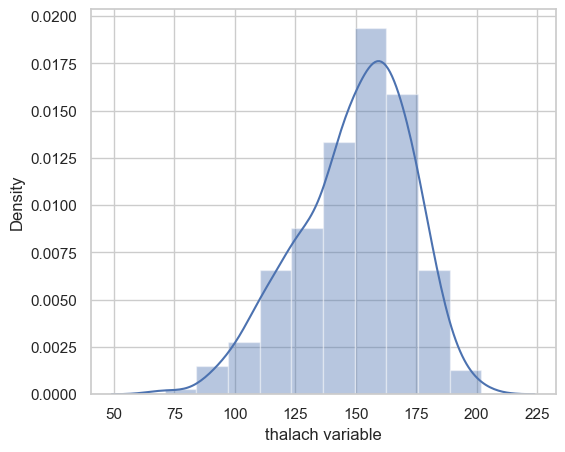

In [82]:
fig, ax = plt.subplots(figsize=(6, 5))
x = df['thalach']
x = pd.Series(x, name='thalach variable')
ax = sns.distplot(x, bins=10)
plt.show()

We can plot the distribution on the vertical axis as follows:-

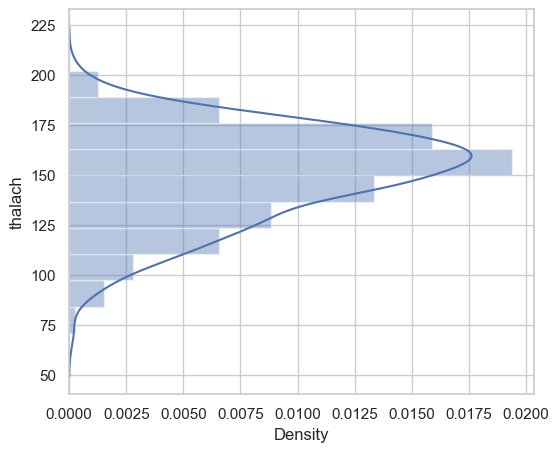

In [83]:
fig, ax = plt.subplots(figsize=(6,5))
x = df['thalach']
ax = sns.distplot(x, bins=10, vertical=True)
plt.show()

#### Seaborn Kernel Density Estimation (KDE) Plot


- The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.

- The KDE plot, plots the density of observations on one axis with height along the other axis.

- We can plot a KDE plot as follows :

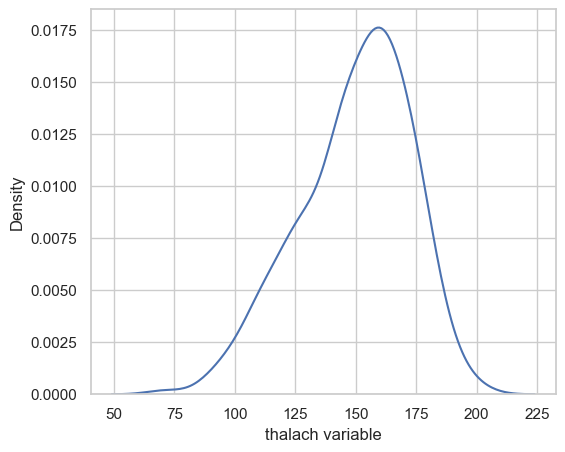

In [84]:
fig, ax = plt.subplots(figsize=(6,5))
x = df['thalach']
x = pd.Series(x, name='thalach variable')
ax = sns.kdeplot(x)
plt.show()

We can shade under the density curve and use a different color as follows:

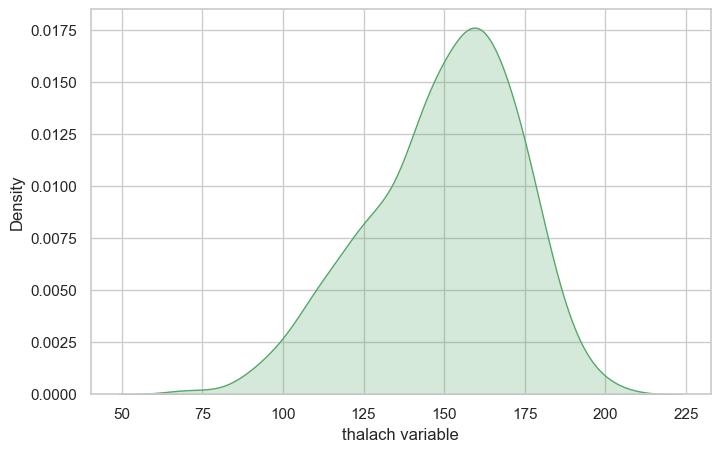

In [96]:
fig, ax = plt.subplots(figsize=(8,5))
x = df['thalach']
x = pd.Series(x, name='thalach variable')
ax = sns.kdeplot(x, fill=True, color='g')
plt.show()

#### Histogram

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

- We can plot a histogram as follows :

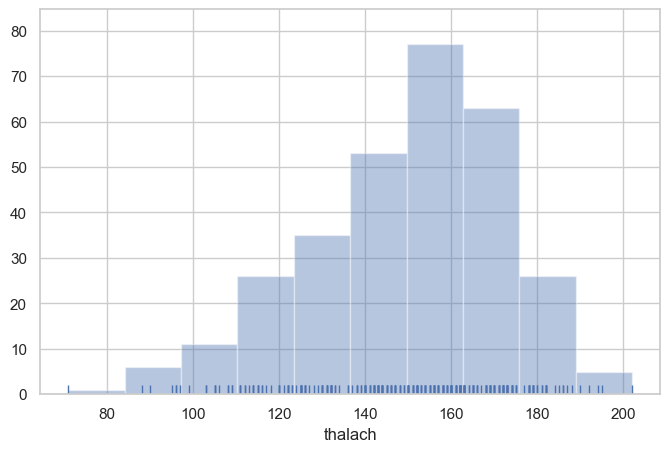

In [99]:
fig, ax = plt.subplots(figsize=(8,5))
x = df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

Visualize frequency distribution of `thalach` variable w.r.t `target`

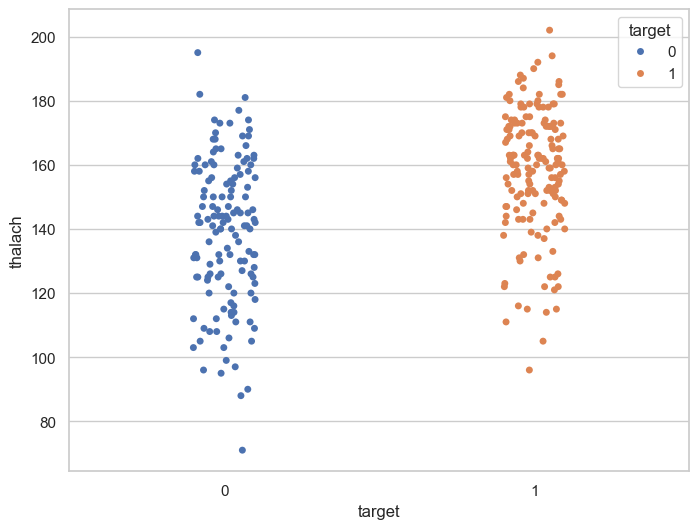

In [156]:
fig, ax = plt.subplots(figsize = (8,6))
ax  =sns.stripplot(x='target', y='thalach', data=df, hue='target')
plt.show()

#### Interpretation

- We can see that those people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

We can add jitter to bring out the distribution of values as follows :

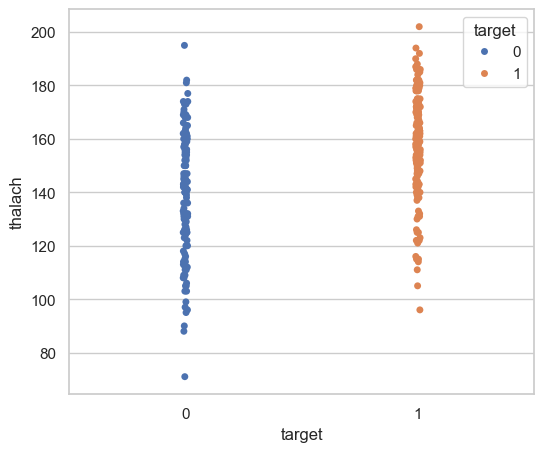

In [159]:
fig, ax = plt.subplots(figsize=(6,5))
sns.stripplot(x='target', y='thalach', data=df, jitter='0.01', hue='target')
plt.show()

#### Visualize distribution of `thalach` variable wrt `target` with boxplot

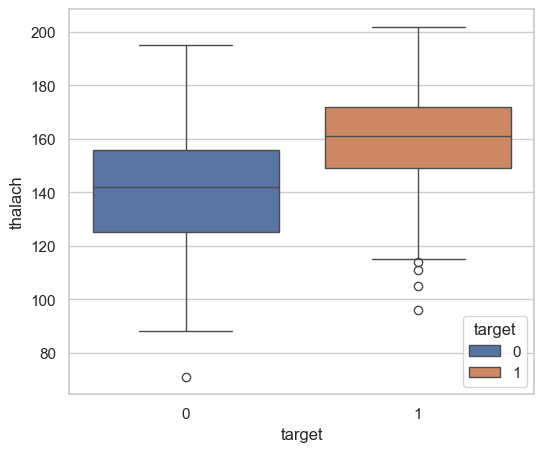

In [163]:
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x='target', y='thalach', data=df, hue='target')
plt.show()

#### Interpretation

The above boxplot confirms our finding that people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

### Findings of Bivariate Analysis <a class="anchor" id="8.4"></a>

Findings of Bivariate Analysis are as follows –


- There is no variable which has strong positive correlation with `target` variable.

- There is no variable which has strong negative correlation with `target` variable.

- There is no correlation between `target` and `fbs`.

- The `cp` and `thalach` variables are mildly positively correlated with `target` variable. 

- We can see that the `thalach` variable is slightly negatively skewed.

- The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

- The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).
